# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  
Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### План работы:  
**Шаг 1. Изучить общую информацию**  

**Шаг 2. Предобработка данных**  

**Шаг 3. Добавить в таблицу:**  
цену квадратного метра;  
день недели, месяц и год публикации объявления;  
этаж квартиры; варианты — первый, последний, другой;  
соотношение жилой и общей площади, а также отношение площади кухни к общей.  

**Шаг 4. Провести исследовательский анализ данных:**  
Изучить следующие параметры: площадь, цена, число комнат, высота потолков. 
Изучите время продажи квартиры.  
Какие факторы больше всего влияют на стоимость квартиры?  
Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.  
Выделить центральную область, проанализировать эту территорию. Выделить факторы, которые влияют на стоимость квартиры.


## Шаг 1. Изучить общую информацию. 

In [1]:
import pandas as pd
import numpy as np

---
## Комментарий от наставника

Неудачные попытки считывания информации не несут в себе смысла, поэтому их лучше не оставлять в проекте.

---

In [2]:
apartments_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')
apartments_data.head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
apartments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

- тип float64 с плавающей точкой у полей для только целых значений:
floors_total, balcony, parks_around3000, ponds_around3000, days_exposition 
- пропуски по info и визуально заметно, что в данных есть пропуски, больше всего в колонке is_apartment. В parks_around3000 и ponds_around3000 имеют одинаковое количество строк


## Шаг 2. Предобработка данных

### 2.1 Работа с пропущенными значениями. 
Посмотрим количество пропусков:

In [4]:
apartments_data.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Есть похожее количество пропусков в группе автоматически собранных данных  
airports_nearest         5542  
cityCenters_nearest      5519  
parks_around3000         5518  
ponds_around3000         5518  

Интересно, что географических данных по расстоянию до ближайших озер и парков пропущено больше, чем по количеству озер и парков в ближайших трех километрах:  
parks_nearest           15620  
ponds_nearest           14589  

то есть в какой-то строке могут быть данные о количестве парков в радиусе трех км, но не быть записи о расстоянии до ближайшего парка

Видимо для parks_around3000 и ponds_around3000 в том случае, когда парка или озера нет, то ставится 0, ведь там нужно указать количество. То есть в этих колонках может быть как раз примерно такое количество нолей как разница между:  
`parks_nearest - parks_around3000 (15620 - 5518)`:    **10102**  
`ponds_nearest - ponds_around3000 (14589 - 5518)`:    **9071**  
Посчитаем количество нолей для parks_around3000 и ponds_around3000.

In [5]:
len(apartments_data.query('parks_around3000 == 0'))

10106

In [6]:
len(apartments_data.query('ponds_around3000 == 0'))

9071

В случае озер данные совпали полностью, в случае парков разница в 4 записи. Можно предположить, что пропуски в parks_nearest и ponds_nearest возникли, потому что есть объекты недвижимости, для которых парки и озера находятся за пределами какого-то расстояния (точно больше 3х километров), котоое недоступно для автоматического сбора.

еще осталась группа автоматических данных с примерно одинаковым числом пропусков:  
airports_nearest         5542  
cityCenters_nearest      5519  
parks_around3000         5518  
ponds_around3000         5518  
Посмотрим на эти записи:

In [7]:
apartments_data[apartments_data['ponds_around3000'].isnull()].head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


По первым 15 строкам видно, что данные объекты недвижимости находятся не в Санкт-Петербурге. Возможно у поставщика геоданных проблемы с определением центра города и расстояния до аэропорта для объектов из маленьких населенных пунктов.
Возьмем пересечение записей с отсутствующими данными для airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 и посмотрим их населенные пункты

In [8]:
empty_geo_group = apartments_data[(apartments_data['airports_nearest'].isnull())
                & (apartments_data['cityCenters_nearest'].isnull())
                & (apartments_data['parks_around3000'].isnull())]
len(empty_geo_group)


5518

In [9]:
empty_spb = empty_geo_group.query('locality_name == "Санкт-Петербург"')

len(empty_spb)

61

Из 5518 пустующих строк с похожими по количеству строк пропусков 61 приходятся на Санкт-Петербург, остальные **5457** (5518 - 61) -- из других населенных пунктов области. Так что возможно, пропуски в данных связаны имеено с локализацией этих объектов недвижимости. Чтобы проверить это можно сделать срез по всей выборке городов не Санкт-Петербург, посмотреть сколько их, есть ли там заполненные значения.

In [10]:
non_spb = apartments_data.query('locality_name != "Санкт-Петербург"')
len(non_spb)

7978

Похоже есть еще 2521 (7978 - 5457) объявление не из Санкт-Петербурга, но с гео данными по airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000.

Возможно, сбор данных прекращается после какого-то радиуса удаленности от Санкт-Петербурга.
Найдем самое большое расстояние до аэропорта, до центра, и посмотрим, что это за населенные пункты

In [11]:
apartments_data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [12]:
far_airport = apartments_data.query('airports_nearest > 80000')
far_airport

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000.0,59.0,2017-07-23T00:00:00,3,2.50,5.0,37.0,1,False,...,7.0,NaN,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
2974,13,3200000.0,46.3,2018-03-31T00:00:00,2,2.50,3.0,29.2,2,NaN,...,7.0,1.0,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
5218,15,3650000.0,53.8,2018-09-24T00:00:00,3,2.50,4.0,36.9,3,NaN,...,5.2,NaN,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
5340,19,3600000.0,50.6,2019-03-19T00:00:00,2,2.50,5.0,29.9,4,NaN,...,7.0,1.0,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
9640,8,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5.0,31.0,2,NaN,...,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
18884,15,3600000.0,57.6,2019-02-08T00:00:00,3,2.55,3.0,41.3,2,NaN,...,6.5,1.0,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0
20746,1,3300000.0,43.5,2016-02-16T00:00:00,2,2.55,4.0,27.2,2,NaN,...,5.0,1.0,посёлок Молодёжное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0


In [13]:
apartments_data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [14]:
far_center = apartments_data.query('cityCenters_nearest > 60000')
far_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000.0,59.0,2017-07-23T00:00:00,3,2.50,5.0,37.0,1,False,...,7.0,NaN,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
2974,13,3200000.0,46.3,2018-03-31T00:00:00,2,2.50,3.0,29.2,2,NaN,...,7.0,1.0,Зеленогорск,81355.0,62454.0,0.0,NaN,0.0,NaN,205.0
5218,15,3650000.0,53.8,2018-09-24T00:00:00,3,2.50,4.0,36.9,3,NaN,...,5.2,NaN,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
5340,19,3600000.0,50.6,2019-03-19T00:00:00,2,2.50,5.0,29.9,4,NaN,...,7.0,1.0,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
9640,8,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5.0,31.0,2,NaN,...,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
16569,13,3200000.0,52.8,2017-06-20T00:00:00,2,2.55,5.0,29.9,3,NaN,...,8.3,NaN,Ломоносов,53042.0,61495.0,2.0,223.0,0.0,NaN,240.0
18884,15,3600000.0,57.6,2019-02-08T00:00:00,3,2.55,3.0,41.3,2,NaN,...,6.5,1.0,Зеленогорск,81607.0,62706.0,0.0,NaN,0.0,NaN,13.0
20746,1,3300000.0,43.5,2016-02-16T00:00:00,2,2.55,4.0,27.2,2,NaN,...,5.0,1.0,посёлок Молодёжное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
23123,0,1800000.0,32.0,2018-07-17T00:00:00,1,NaN,2.0,17.0,1,NaN,...,6.0,NaN,Ломоносов,56896.0,60223.0,1.0,17.0,0.0,NaN,147.0


Самая дальняя точка - Поселок Молодежное и по дистанции до аэропорта и по расстоянию от центра (видимо центра Санкт-Петербурга)

In [15]:
empty_geo_group['locality_name'].describe()

count               5510
unique               344
top       посёлок Мурино
freq                 522
Name: locality_name, dtype: object

чтож лидер в группе с пропущенными геоданными посёлок Мурино - 552 записи. Видимо, дело все же не в радиусе
от центра (судя по карте Мурино ближе к центру Санкт-Петербурга, чем поселок Молодежное).  
Посмотрим, есть ли данные для Мурино

In [16]:
apartments_data[(~apartments_data['airports_nearest'].isnull())
                & (apartments_data['locality_name']
                   .isin(("посёлок Мурино", "поселок Мурино")))]




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10259,1,3440000.0,44.83,2016-05-25T00:00:00,2,NaN,NaN,NaN,5,NaN,...,NaN,0.0,поселок Мурино,51553.0,21888.0,0.0,NaN,2.0,133.0,46.0
11425,1,2100000.0,25.53,2016-05-10T00:00:00,1,NaN,NaN,NaN,4,NaN,...,NaN,0.0,поселок Мурино,51553.0,21888.0,0.0,NaN,2.0,133.0,61.0


###  Выводы по пропускам в геоданных
На данный момент:  
1. Есть пропуски около 5518 строках в геоданных airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000  
2. Если parks_around3000, ponds_around3000 = 0, то parks_nearest и ponds_nearest NaN, таких соответственно 10106 и 9071 пропусков  

Для первого пункта не сработала гипотеза о том, что за переделами некоего радиуса геоданные перестают собираться. Возможно, если предположить, что эти параметры высчитываются по адресу квартиры, который указан в объявлении, то эти адреса были некорректно записаны/неверно прочитаны, и гео данные не определились.  
Для второго случая может быть так, что если в радиусе 3 км не находится парков/озер, то и дальше гео не срабатывает на поиск таких объектов. Об этой магической особенности надо сообщить коллегам.  

Из перечисленных параметров для дальнейшей работы нам понадобится знать расстояние до центра, поэтому попытаемся заполнить эти пропуски характерными значениями для населенный пунктов, где эти данные присутствуют. Для этого нужно будет еще и избавиться от дубликатов в населенных пунктах, связанных с 'е' и 'ё'

In [17]:
apartments_data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [18]:
apartments_data['locality_name'] = apartments_data['locality_name'].str.replace('ё', 'е' ).str.lower()

In [19]:
apartments_data['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [20]:
apartments_data['cityCenters_nearest'] = (apartments_data.groupby('locality_name')['cityCenters_nearest']
                                          .apply(lambda x: x.fillna(x.median())))
        
apartments_data['cityCenters_nearest'].isnull().sum()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


4913

Ну что же, вместо 5519 пропусках в расстоянии до центра стало 4913 (всего добавилось 609 записей), значит для остальных локаци не нашлось заполненных значений

Кроме пропусков по геоданным есть еще и пропуски в данных, заполненных людьми.  
**is_apartment**      -     20924 возможно эти данные люди не заполняют автоматически, так как большинство продает квартиры,а не апартаменты, поэтому не задумываются заполнить это поле.  
**balcony**                 11519 тут можно заполнить пропуски, в том случае, если это первый этаж, предположить, что балконов нет



In [21]:
apartments_data[apartments_data['floor'] == 1]['floor'].count()

2917

In [22]:
apartments_data['balcony'] = (apartments_data['balcony']
                                .where(~(apartments_data['balcony'].isnull() & (apartments_data['floor'] == 1)),
                                      0))

Есть группа данных, которую сложно заполнить характерными значениями. Но, например, для высоты потолков все же можно было бы выбрать скажем медианное значение, однако, непонятно, на какие группы разбить записи. По цене? Как мне кажется, это значит, что таким образом мы уже предполагаем, что цена квартиры как-то зависит от высоты потолков. Оставим пропуски в этой группе данных:  
**ceiling_height**    -      9195  
**kitchen_area**       -      2278  
**living_area**       -       1903  
**floors_total**      -         86  
**locality_name**       -       49   

Последний оставшийся пропуск в количесве дней объявления. Этот вид данных больше похож на автоматически собранный. Может быть это значит, что объявления еще не закрыты.  
**days_exposition**    -      3181  

Заполним пропуски в столбцах жилая площадь и площадь кухни:

In [23]:
kitchen_part = (apartments_data['kitchen_area']/apartments_data['total_area']).mean()
living_part = (apartments_data['living_area']/apartments_data['total_area']).mean()

apartments_data['living_area'] = (apartments_data['living_area']
                                  .where(~(apartments_data['living_area'].isnull()),
                                         living_part))
apartments_data['kitchen_area'] = (apartments_data['kitchen_area']
                                   .where(~(apartments_data['kitchen_area'].isnull()),
                                          kitchen_part))

In [24]:
#apartments_data['ceiling_height'] = apartments_data['ceiling_height'].fillna('Неизвестно')
apartments_data['balcony'] = apartments_data['balcony'].fillna('Неизвестно')
apartments_data['locality_name'] = apartments_data['locality_name'].fillna('Неизвестно')

Посмотрим, как заполнились эти колонки:

In [25]:
apartments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null object
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18786 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

### 2.2. Приведение даных к нужным типам

Еще раз посмотрим на то, как выглядят данные:

In [26]:
apartments_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,Неизвестно,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,0.564766,9,NaN,...,0.187355,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,Неизвестно,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Для удобства переведем стоимсоть квартиры в миллионы, округлив до трех. А так же исправим дату публикации в формат datetime

In [27]:
apartments_data['first_day_exposition'] = (pd.to_datetime(apartments_data['first_day_exposition'],
                                                          format='%Y-%m-%dT%H:%M:%S'))
apartments_data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [28]:
apartments_data['last_price'] = (apartments_data['last_price']/1000000).round(3)
apartments_data['last_price'].head()

0    13.000
1     3.350
2     5.196
3    64.900
4    10.000
Name: last_price, dtype: float64

## Шаг 3. Посчитать и добавить в таблицу

- цену квадратного метра;  
- день недели, месяц и год публикации объявления;  
- этаж квартиры; варианты — первый, последний, другой;  
- соотношение жилой и общей площади, а также отношение площади кухни к общей.  

Добавим **цену квадратного метра**, нам понадобятся записи в колонках last_price и total_area. Они без пропусков, так что просто поделим нужные значения столбцов:

In [29]:
apartments_data['sq_meter_price'] = apartments_data['last_price']/apartments_data['total_area']
apartments_data['sq_meter_price'] = (apartments_data['sq_meter_price']*1000000).round(0).astype('int')
apartments_data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,Неизвестно,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,0.564766,9,NaN,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,Неизвестно,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


Добавим **день недели, месяц и год** публикации объявления

In [30]:
apartments_data['pub_weekday'] = apartments_data['first_day_exposition'].dt.weekday
apartments_data['pub_month'] = apartments_data['first_day_exposition'].dt.month
apartments_data['pub_year'] = apartments_data['first_day_exposition'].dt.year

apartments_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82921,1,12,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,0.564766,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


Сгруппируем этажи по трем категориям: **первый, последний, другой**  
в графе flors_total есть пропуски, поэтому будем проверять наличие даннных, иначе присваивать категорию 'дугой' этаж

In [31]:
def group_floors(row):
    floor = row['floor']
    flors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if flors_total and floor == flors_total:
        return 'последний'
    return 'другой'


apartments_data['floor_categories'] = apartments_data.apply(group_floors, axis=1)
apartments_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year,floor_categories
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82921,1,12,2018,первый
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015,другой
3,0,64.900,159.00,2015-07-24,3,NaN,14.0,0.564766,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2.890,30.40,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,NaN,NaN,NaN,NaN,55.0,95066,0,9,2018,другой
6,6,3.700,37.30,2017-11-02,1,NaN,26.0,10.600000,6,NaN,...,0.0,NaN,0.0,NaN,155.0,99196,3,11,2017,другой
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,0.564766,22,NaN,...,0.0,NaN,0.0,NaN,NaN,110545,3,4,2019,другой
8,20,2.900,33.16,2018-05-23,1,NaN,27.0,15.430000,26,NaN,...,NaN,NaN,NaN,NaN,189.0,87455,2,5,2018,другой
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88525,6,2,2017,другой


**Cоотношение жилой и общей площади**

In [32]:

apartments_data['living_total_area'] = apartments_data['living_area'] / apartments_data['total_area']
apartments_data['living_total_area'] = apartments_data['living_total_area'].round(3)
apartments_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year,floor_categories,living_total_area
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.472
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,NaN,0.0,NaN,81.0,82921,1,12,2018,первый,0.460
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,0.612
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,0.564766,9,NaN,...,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.004
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320


**Отношение площади кухни к общей площади**

In [33]:
apartments_data['kitchen_total_area'] = apartments_data['kitchen_area'] / apartments_data['total_area']
apartments_data['kitchen_total_area'] = apartments_data['kitchen_total_area'].round(3) 
apartments_data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year,floor_categories,living_total_area,kitchen_total_area
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472,0.231
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,0.0,NaN,81.0,82921,1,12,2018,первый,0.460,0.272
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,2.0,574.0,558.0,92786,3,8,2015,другой,0.612,0.148
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,0.564766,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.004,0.001
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320,0.410


---
## Комментарий от наставника

Добавление необходимых столбцов выполнено верно.

---

## Шаг 4. Провести исследовательский анализ данных:

## 4.1 Изучить следующие параметры:  
- площадь, цена, число комнат, высота потолков.  
- построить гистограммы для каждого параметра.

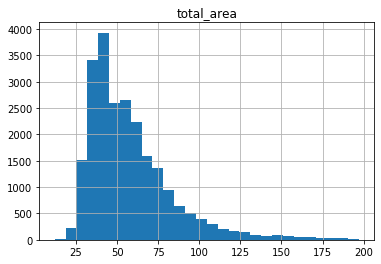

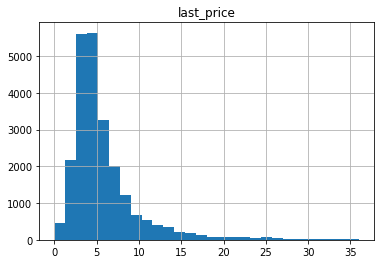

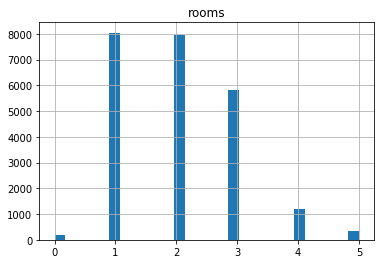

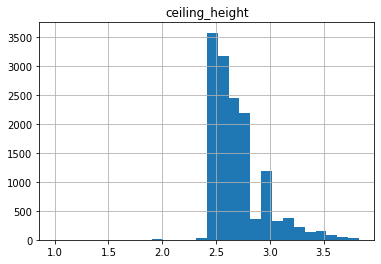

In [116]:
extracted = apartments_data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
for col_name in extracted:
    clmn = extracted[col_name]
    rr = clmn.quantile(.99)
    lr = clmn.min()
    extracted.hist(col_name, bins=28, range=(lr, rr))

<font color=green> Можно также добавить и boxplot сюда же. Тогда для каждого параметра будет производиться построение сразу двух важных для нас графиков. В целом, все хорошо.
    
---

### Площадь

In [35]:
apartments_data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [36]:
apartments_data.query('total_area > 250')['total_area'].count()

112

### Цена

In [37]:
apartments_data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Бросается в глаза максимальная стоимость квартиры за 763 миллиона, посмотрим, как много подобных цен

In [38]:
apartments_data.query('last_price > 50')['last_price'].count()

131

### Число комнат

In [39]:
apartments_data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [40]:
apartments_data.query('rooms > 5')['rooms'].count()

195

### Высота потолков

In [41]:
apartments_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [42]:
apartments_data.query('ceiling_height > 20')['ceiling_height'].count()

22

Где-то есть квартиры со  стометровыми потолками, площадью 900 метров за 763 миллиона и всего с 10 комнатами (на самом деле это не одна и та же квартира, как выяснилось ниже)! За исключением таких выбросов, на которые приходится до 200 записей вцелом распределение площади, цены, высот потолков и количества комнат выглядят вполне правдоподобно, форма графика напоминает распределение Пуассона.

In [43]:
apartments_data.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year,floor_categories,living_total_area,kitchen_total_area
19540,8,420.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,...,2.0,318.0,106.0,466667,2,12,2017,последний,0.455,0.124


## 4.2 Изучить время продажи квартиры. 
- Построить гистограмму.
- Посчитать среднее и медиану.
- Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [44]:
apartments_data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9049eac8>]],
      dtype=object)

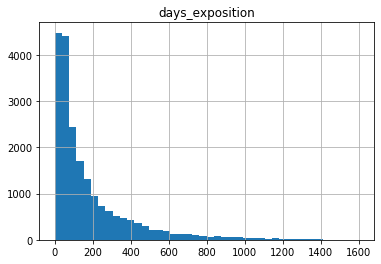

In [45]:
apartments_data.hist('days_exposition', bins=42, range=(0, 1600))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c90ae11d0>]],
      dtype=object)

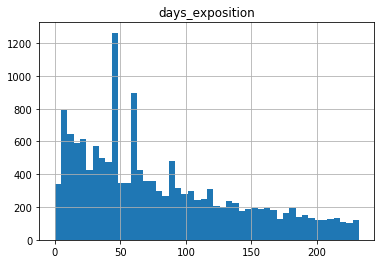

In [46]:
apartments_data.hist('days_exposition', bins=48, range=(0, 232))

У половины объявлений продажа наступает в течении 50 дней. Интересны скачки интенсивности в районе 45, 58 дней. Получается, самый чястотный случай для продажи - 45 дней. Можно сказать, что этого дня продажа прошла очень быстро. 

Посмотрим, как распределяется частота дней для 'хвоста':

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9004c278>]],
      dtype=object)

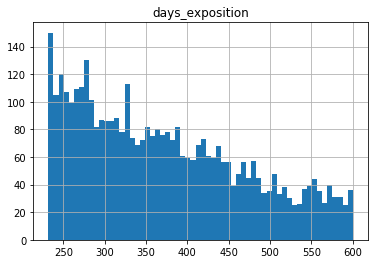

In [47]:
apartments_data.hist('days_exposition', bins=60, range=(232, 600))

Опять можно заметить всплески активности продаж (видимо автоматически объявление обновляется и становится видно новым посетителям, которые могут стать потенциальными покупателями). так вот последний такой пик (правда частота там всего около 110 записей) приходится где-то на 325 день. Думаю, после этого можно считать, что продажа произошла очень долго

## 4.3 Убрать редкие и выбивающиеся значения. 
- Описать, обнаруженные особенности.

С помощью диаграммы размаха можно выбрать выбивающиеся значения.

### 4.3.1 Время продажи квартиры

In [48]:
import matplotlib.pyplot as plt 

(-100, 560)

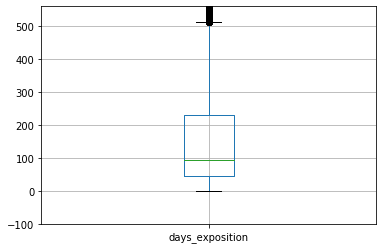

In [49]:
apartments_data.boxplot('days_exposition')
plt.ylim(-100, 560)

Для days_exposition уберем время продажи большее 500 дней.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9074b240>]],
      dtype=object)

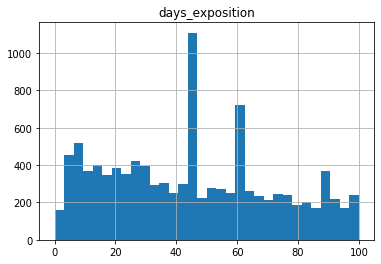

In [50]:
apartments_data.hist('days_exposition', bins=32, range=(0, 100))

Особенности с повторяющимися всплесками, описана выше.

### 4.3.2 Высота потолков

(2, 3.5)

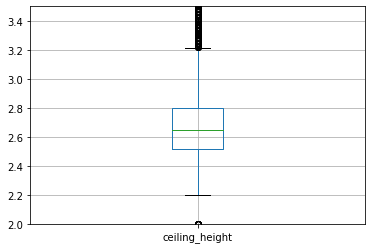

In [51]:
apartments_data.boxplot('ceiling_height')
plt.ylim(2, 3.5)

Границы 'усов' от 2.2 до 3.2. Посмотрим, как выглядит распределение высот потолков в этом диапазоне.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c905d9780>]],
      dtype=object)

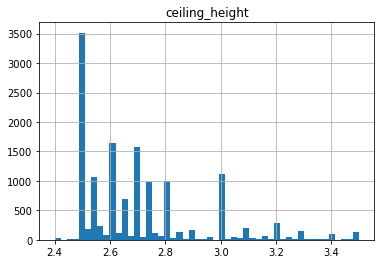

In [52]:
apartments_data.hist('ceiling_height', bins=50, range=(2.4, 3.5))

У потолков не так много вариативностей. Видимо, инженерной практике существуют несколько нормативов высот потолков и 2,5 наиболее часто распространена среди объявлений.

### 4.3.3 Число комнат

(-2, 10)

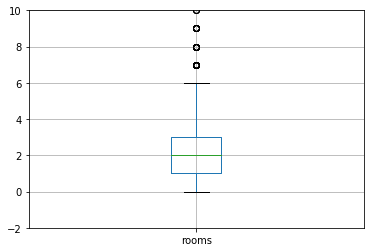

In [53]:
apartments_data.boxplot('rooms')
plt.ylim(-2, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c90747d30>]],
      dtype=object)

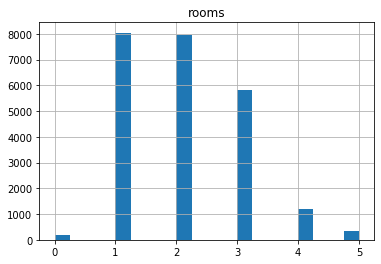

In [54]:
apartments_data.hist('rooms', bins=20, range=(0, 5))

Ну что ж полторы комнаты не бывает. Однокомнатные и двушки -- вот они лидеры. Можно предположить, что комнаты с 0 квартир и, возможно, некоторые однокомнатные -- это во многом студии. Посмотрим так ли это.

In [55]:
apartments_data.pivot_table(index='rooms', values='studio', aggfunc=['count', 'sum']).head()

,count,sum
,studio,studio
rooms,,
0,197,138.0
1,8047,11.0
2,7940,0.0
3,5814,0.0
4,1180,0.0


Похоже однокомнатные все же однокомнатные, а вот нулевые на 3/4 студии

### 4.3.4 Цена квартиры

(-2, 13)

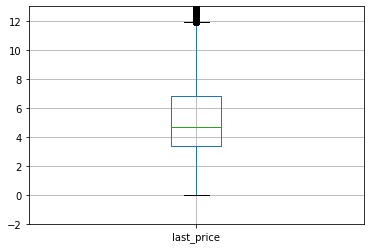

In [56]:
apartments_data.boxplot('last_price')
plt.ylim(-2, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9038a5f8>]],
      dtype=object)

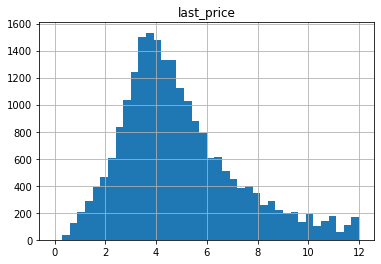

In [57]:
apartments_data.hist('last_price', bins=40, range=(0, 12))

После отсечения выбросов распределение стоимости выглядит вполне реалистично, для дальнейших расчетов добавим в таблицу столбец с ценами без экстремальных значений

In [58]:
apartments_data['smooth_last_price'] = apartments_data.query('last_price < 12')['last_price']

### 4.3.5 Общая площадь

(10, 120)

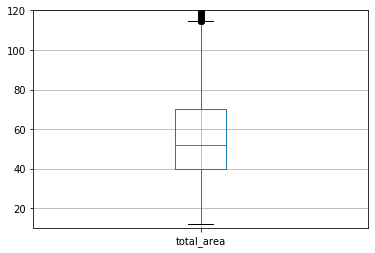

In [59]:
apartments_data.boxplot('total_area')
plt.ylim(10, 120)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8bb0ee10>]],
      dtype=object)

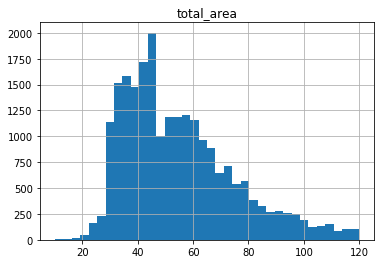

In [60]:
apartments_data.hist('total_area', bins=36, range=(10, 120))

Распределение площади без экстремумов так же не имеет какой-то особой специфичности и напоминает распределение Пуассона

## 4.4. Какие факторы больше всего влияют на стоимость квартиры? 
зависит ли цена от  
- квадратного метра 
- числа комнат  
- удалённости от центра  
- на каком этаже расположена квартира: первом, последнем или другом  
- от даты размещения: дня недели, месяца и года  

### 4.4.1 Зависимость цены от квадратного метра

Для начала построим гистограмму распределения стоимости квадратного метра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8b735cc0>]],
      dtype=object)

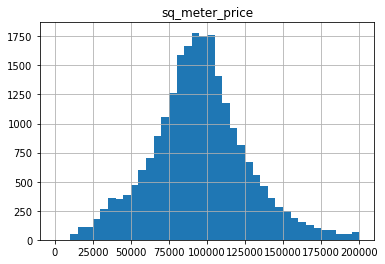

In [61]:
apartments_data.hist('sq_meter_price', bins=40, range=(0, 200000))

Согласно графику в основом люди покупают квартиры стоимостью от 75 до 122 тыс за квадратный метр. А основная частота для стоимстей квартир от 3 до 5 миллионов. Построим диаграмму рассеивания двух велчин

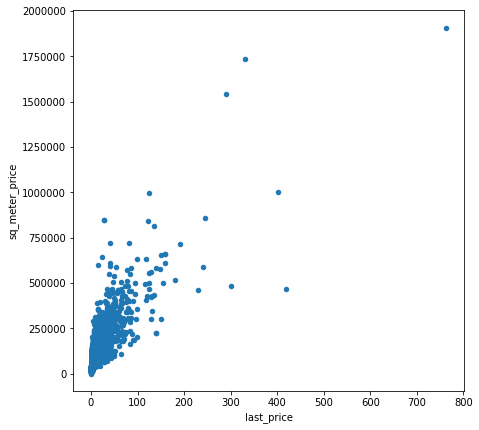

In [62]:
apartments_data.plot(x='last_price', y='sq_meter_price', kind='scatter', figsize=(7, 7))

Работать с данными с выбросами в total_area не очень удобно. Построим график, без учета всех выбросов. Так мы смжем рассмотреть основную площадь графика более детально. Сначала так же избавимся от выбросов в стоимсоти квадратного метра. Ведь она посчитана на основе общей площади

(20000, 200000)

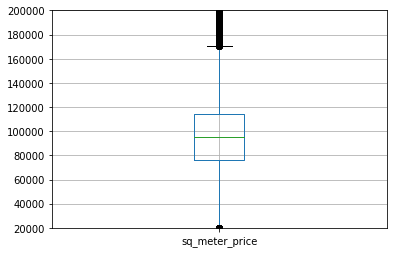

In [63]:
apartments_data.boxplot('sq_meter_price')
plt.ylim(20000, 200000)

In [64]:
apartments_data['smooth_sq_meter_price'] = apartments_data.query('20000 < sq_meter_price < 170000')['sq_meter_price']

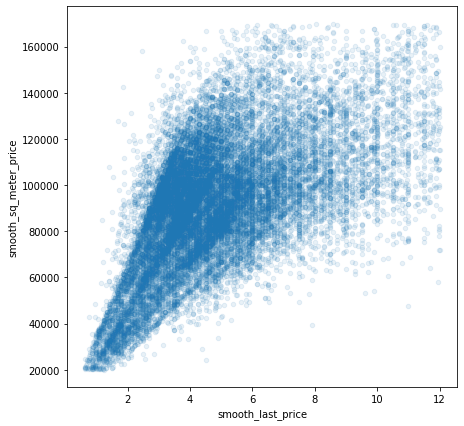

In [65]:
apartments_data.plot(x='smooth_last_price', y='smooth_sq_meter_price', kind='scatter', figsize=(7, 7), alpha=0.1)

Общее направление крафика -- некая диагональ, грубо говоря, чем дороже стоит квартира, тем дороже квадратный метр, что вполне логично.  
На таком отображении графка, кроме больших областей сгущенности, есть и менее заметные вертикальные полоски, повторяющиеся с примерно одинаковым интервалом. Можно подумать, что квадратный метр в квартире общей стоимостью от 6 миллионов может стоить 70 и 140 тысяч за квадратный метр -- то есть здесь уже четкая положительная корреляция пропадает. Как минимум общая стоимость квартиры складывается и из площади. И после 6 миллионов, возможно люди покупают как небольшие по площади, но дорогие квартиры, так и квартиры с большей площадью, но более дешевой ценой за квадратный метр.   
Кроме того, есть и диагональные линии из начала координат крафика, где для одних и тех же стоимостей квартир есть разные лини крутизны повыщения стоимости квадратного метра. Видимо, есть несколько сегментов недвижимости, в одних общая стоимсоть растет из-за дороговизны квадратного метра, в других -- и из-за площади. 
В середине графика область где пересекаются наибольшие частоты обеих величин.

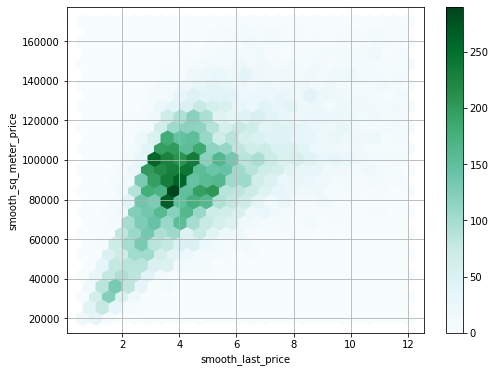

In [66]:
apartments_data.plot(x='smooth_last_price', y='smooth_sq_meter_price', kind='hexbin', gridsize=25, figsize=(8, 6), sharex=False, grid=True)

In [67]:
apartments_data['smooth_last_price'].corr(apartments_data['smooth_sq_meter_price'])

0.5880513086866501

Корреляция в 0,58 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение стоимости квадратного метра сопровождается увеличением стоимости квартиры, но так бывает не всегда.

### 4.4.2 Зависимость стоимости от удалённости от центра

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9003a4a8>]],
      dtype=object)

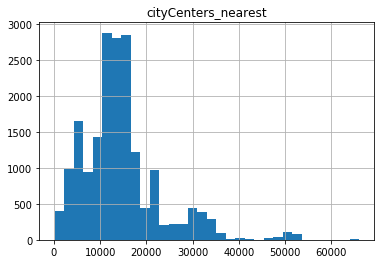

In [68]:
apartments_data.hist('cityCenters_nearest', bins=32)

Судя по распределению графика удаленности от центра, в основном размещают объявления недвижимости в пределах 20 км. Посомтрим на графие зависимости между стоимостью и удаленностью от центра.

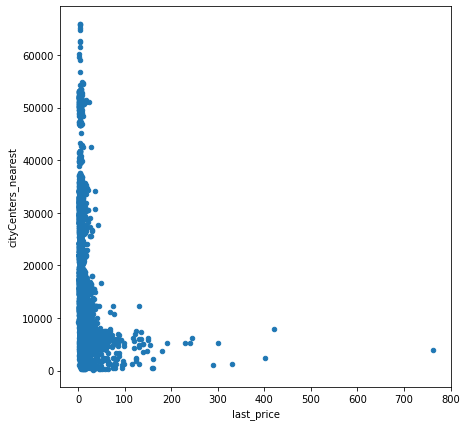

In [69]:
apartments_data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', figsize=(7, 7))

Из-за использования занчения стоимости квартир с выбросами на графике большая скученнность, возьмем значения стоимости квартир из этой области, используем значения стоимостей квартир без выбросов.

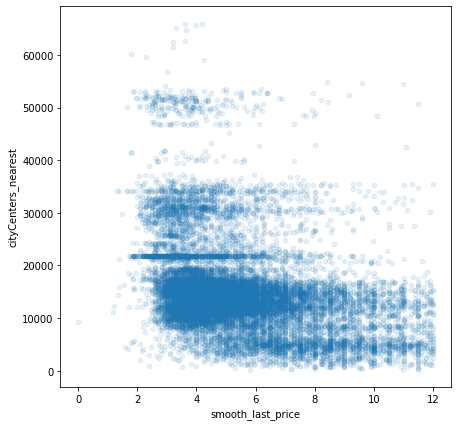

In [70]:
apartments_data.plot(x='smooth_last_price', y='cityCenters_nearest', kind='scatter', figsize=(7, 7), alpha=0.1)

Те самые частые квартиры стоимостью от 3 до 5 миллионов люди покупают в пределах от 10 до 20 километров от центра.  
Однако, общее направление графика горизонтальное, похоже ни положительной ни отрицательной корреляции между расстоянием от центра и стоимостью квартиры нет.  
Есть еще интересная горизонтальная полоса квартир от 2 до 6 миллионов на расстоянии около 22 километров -- какой-то популярный дачный поселок, или город-курорт вроде Зеленогорска?


In [71]:
apartments_data.query('21000 < cityCenters_nearest < 23000')['locality_name'].value_counts()

поселок мурино       556
санкт-петербург      334
поселок парголово     31
поселок стрельна       9
поселок шушары         1
Name: locality_name, dtype: int64

In [72]:
apartments_data.query('locality_name == "поселок мурино"')['locality_name'].count()

556

In [73]:
apartments_data.query('locality_name == "поселок мурино"')['cityCenters_nearest'].value_counts()

21888.0    556
Name: cityCenters_nearest, dtype: int64

Ну Мурино не то чтобы Зеленогорск. Похоже, это линия образовалась из-за заполнения медианным значением расстояний от центра для поселка Мурино.
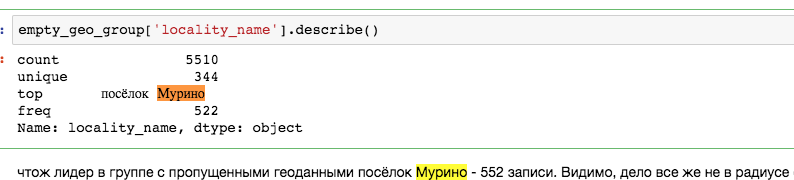

Однако для Мурино было всего две записи о расстоянии до центра и обе они одинаковые, поэтому и value_counts имеет одно значение 21888. Поэтому и образовалась полоска на графике


Посчитаем корреляцию

In [74]:
apartments_data['smooth_last_price'].corr(apartments_data['cityCenters_nearest'])

-0.3614283836896798

Если и есть какие-то зависимости между расстоянием до центра и стоимостью квартир, то они не линейные.

### 4.4.3 Зависимость стоимости квартиры от числа комнат

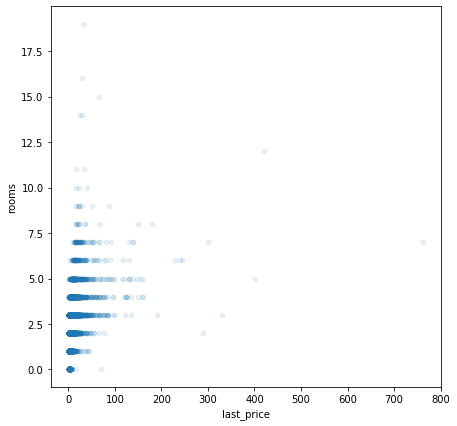

In [75]:
apartments_data.plot(x='last_price', y='rooms', kind='scatter', figsize=(7, 7), alpha=0.1)


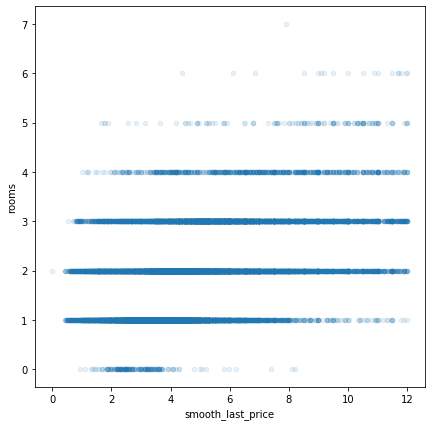

In [76]:
apartments_data.plot(x='smooth_last_price', y='rooms', kind='scatter', figsize=(7, 7), alpha=0.1)


In [77]:
apartments_data['smooth_last_price'].corr(apartments_data['rooms'])

0.45537389758141705

Возможно, число комнат из-за своей дискретности не самый подходящий параметр для рассматривания с помощью диаграммы рассеивания. По началу кажется из-за общей горизонтальной направленности, что в целом неважно сколько комнат в квартире, есть 3х комнатные квартиры и за 2 и за 12 миллионов. Тем не менее, у комнат есть площадь, что тоже немаловажно, а количество квартир можно еще отнести к удобству планировки. Если посмотреть на взаимосвязь с неурезанными комнатами и ценами квартир без выбросов, можно заметить овал из жирности горизонтальных линий, где для более дорогостоящих квартир стерта часть с небольшим количеством комнат, и наоборот, для более дешевых стерта часть с многокомнатсностью. Есть некая зависимоть, но она довольно тонакая.

### 4.4.4 Зависимость стоимости от того, на каком этаже расположена квартира: первом, последнем или другом.

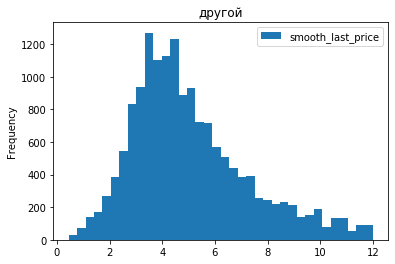

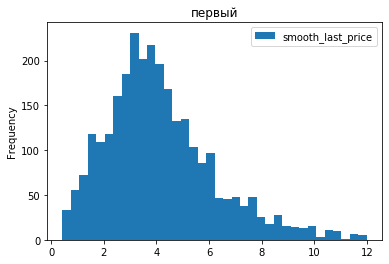

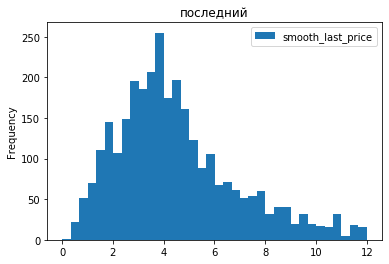

In [78]:
for name, group in apartments_data.groupby('floor_categories'):
    group.plot(y='smooth_last_price', title=name, kind='hist', bins=36)

Распределение по разным группам этажей повторяет общую тенденцию: больше всего покупают квартир по цене примерно от 3 до 5 миллионов. У группы "других" квартир более крутой набор стоимости.  
Посмотрим на медианные значения и количесвто:

In [79]:
apartments_data.pivot_table(index='floor_categories', values='last_price', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
floor_categories,,,,,,,,
другой,3.6,4.85,7.0,17446.0,330.0,6.675444,0.450,8.611335
первый,2.8,3.90,5.4,2917.0,135.0,4.803562,0.430,5.098890
последний,3.0,4.30,6.7,3336.0,763.0,7.361025,0.012,20.692959


Если брать все стоимость квартир, включая "хвосты", видно, что для последних этажей характерно наибольшее присутствие таких аномальных значений.  
Тем не менее, снаименьше медианное значение стоимости у квартир первых этажей (и максимальная стоимсоть квартир там наименьшая), далее последний и другой. Можно предположить, что на первом этаже квартиры стоят дешевле.

### 4.4.5 Изучить зависимость стоимости от даты размещения: дня недели, месяца и года.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8bdc1be0>,
      dtype=object)

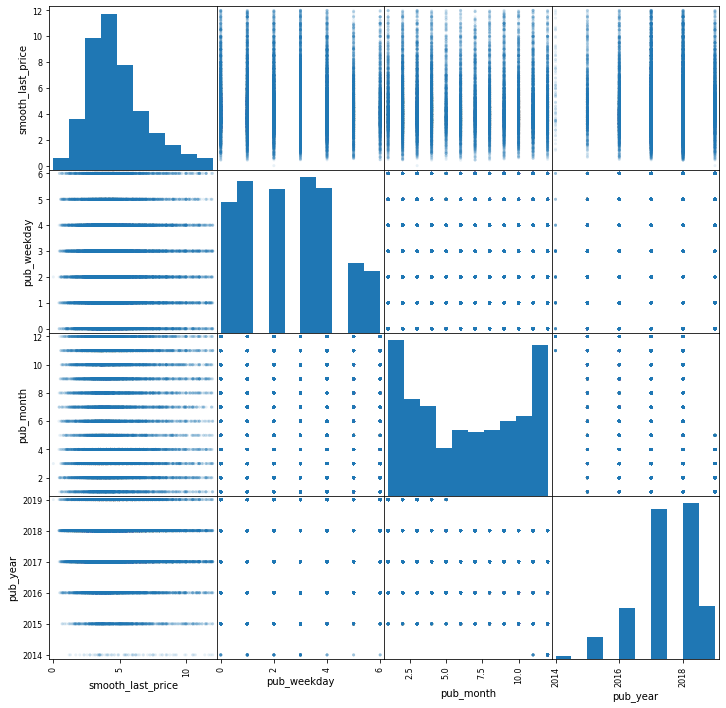

In [80]:
(pd.plotting
 .scatter_matrix(apartments_data[['smooth_last_price', 'pub_weekday', 'pub_month', 'pub_year']],
                 figsize=(12, 12), alpha=0.1))

Ну чтоже, одни паралелиные прямые, похоже линейной корреляции вермен года и цены нет.

In [81]:
apartments_data[['smooth_last_price', 'pub_weekday', 'pub_month', 'pub_year']].corr()

,smooth_last_price,pub_weekday,pub_month,pub_year
smooth_last_price,1.000000,-0.015521,0.005662,-0.004946
pub_weekday,-0.015521,1.000000,0.011496,-0.004799
pub_month,0.005662,0.011496,1.000000,-0.269642
pub_year,-0.004946,-0.004799,-0.269642,1.000000


Матрица корреляции это подтверждает

## 4.5 Выбрать 10 населённых пунктов с наибольшим числом объявлений. 
Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 

In [82]:
top_10_localities = apartments_data['locality_name'].value_counts().head(10)
top_10_localities

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

Лидирует в объявлениях Санкт-Петербург и близлежащие населенные пункты.

In [83]:
apartments_in_top_10_localities = (apartments_data
                                   .query('locality_name in @top_10_localities.index'))


In [84]:
(apartments_in_top_10_localities.pivot_table(index='locality_name', values=['sq_meter_price', 'smooth_sq_meter_price'],
                                             aggfunc=lambda x: x.mean().round(0))
                                .sort_values(by='smooth_sq_meter_price', ascending=False))    

,smooth_sq_meter_price,sq_meter_price
locality_name,,
санкт-петербург,106254.0,114849
пушкин,102148.0,103126
деревня кудрово,92473.0,92473
поселок парголово,90176.0,90176
поселок мурино,85682.0,85682
поселок шушары,78677.0,78677
колпино,75425.0,75425
гатчина,69295.0,68746
всеволожск,67214.0,68654


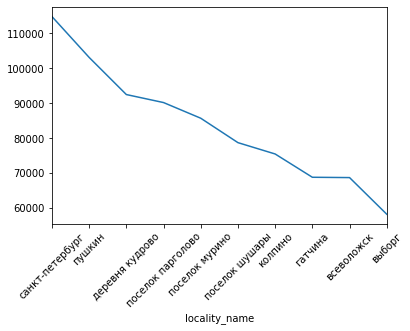

In [124]:
(apartments_in_top_10_localities.pivot_table(index='locality_name', values=['sq_meter_price', 'smooth_sq_meter_price'],
                                             aggfunc=lambda x: x.mean().round(0))
                                .sort_values(by='smooth_sq_meter_price', ascending=False)).sq_meter_price.plot(rot=45)

In [85]:
price_grouped = (apartments_data.pivot_table(index='locality_name', values=['last_price', 'smooth_last_price'],
                                             aggfunc=['min', 'max']))
price_grouped.columns = ['min_price', 'min_smooth_price', 'max_price', 'max_smooth_price']


In [86]:
price_grouped.sort_values(by='min_price').head(10)

,min_price,min_smooth_price,max_price,max_smooth_price
locality_name,,,,
санкт-петербург,0.012,0.012,763.000,11.999
сланцы,0.430,0.430,2.050,2.050
поселок станции свирь,0.430,0.430,0.720,0.720
деревня старополье,0.440,0.440,0.490,0.490
деревня ям-тесово,0.450,0.450,0.800,0.800
деревня вахнова кара,0.450,0.450,0.450,0.450
городской поселок будогощь,0.450,0.450,2.700,2.700
деревня выскатка,0.470,0.470,0.700,0.700
поселок совхозный,0.470,0.470,0.565,0.565


У некоторых населенных пунктов средняя цена за квадратный метр осталась такая же и в группе с сглаженными и с несглаженными ценами квадратного метра. Наибольший разброс судя по всему в Санкт-Петербурге. Когда мы отсекали экстремальные значения с помощью boxplot 120 тыс рублей за квартиру не вышло за рамки "усов" видимо так как близко есть похожие значения.

In [87]:
apartments_data.query('locality_name == "санкт-петербург"').sort_values(by='last_price').head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,sq_meter_price,pub_weekday,pub_month,pub_year,floor_categories,living_total_area,kitchen_total_area,smooth_last_price,smooth_sq_meter_price
8793,7,0.012,109.0,2019-03-20,2,2.75,25.0,32.000000,25,NaN,...,8.0,110,2,3,2019,последний,0.294,0.372,0.012,NaN
19642,5,1.190,14.0,2018-07-29,1,NaN,5.0,11.000000,1,NaN,...,4.0,85000,6,7,2018,первый,0.786,0.143,1.190,85000.0
4248,8,1.200,49.1,2018-10-21,4,2.50,5.0,36.900000,1,NaN,...,44.0,24440,6,10,2018,первый,0.752,0.106,1.200,24440.0
8755,1,1.350,18.8,2017-11-22,0,2.75,19.0,15.800000,1,NaN,...,128.0,71809,2,11,2017,первый,0.840,0.010,1.350,71809.0
17961,3,1.400,13.0,2017-12-03,1,2.60,9.0,0.564766,1,NaN,...,410.0,107692,6,12,2017,первый,0.043,0.014,1.400,107692.0


Видно, что Петербрург возглавил рейтинг городом с самыми дешевыми квартирами скорее всего случайно. Возможно, ошиблись размерностью при записи, а так цены на жилье тут начинаются от 1.2 млн

In [88]:
price_grouped.sort_values(by='max_price', ascending=False).head(10)

,min_price,min_smooth_price,max_price,max_smooth_price
locality_name,,,,
санкт-петербург,0.012,0.012,763.000,11.999
пушкин,1.990,1.990,42.000,11.900
колпино,2.100,2.100,36.900,8.600
поселок репино,4.500,4.500,28.000,11.067
всеволожск,0.966,0.966,24.413,11.000
Неизвестно,1.750,1.750,24.000,11.940
зеленогорск,2.300,2.300,23.000,10.965
петергоф,2.100,2.100,22.000,11.100
сестрорецк,2.800,2.800,21.700,11.990


In [89]:
price_grouped.sort_values(by='max_smooth_price', ascending=False).head(10)

,min_price,min_smooth_price,max_price,max_smooth_price
locality_name,,,,
санкт-петербург,0.012,0.012,763.000,11.999
сестрорецк,2.800,2.800,21.700,11.990
Неизвестно,1.750,1.750,24.000,11.940
пушкин,1.990,1.990,42.000,11.900
кронштадт,2.290,2.290,17.630,11.500
павловск,2.099,2.099,14.500,11.300
петергоф,2.100,2.100,22.000,11.100
поселок репино,4.500,4.500,28.000,11.067
всеволожск,0.966,0.966,24.413,11.000


## 4.6 Изучить предложения квартир: 
- Выделить квартиры в Санкт-Петербурге.
- Выяснить, какая область входит в центр. 
- Создать столбец с расстоянием до центра в километрах: округлить до целых значений.  
- Посчитать среднюю цену для каждого километра.  
- Построить график: он должен показывать, как цена зависит от удалённости от центра.  
- Определить границу, где график сильно меняется — это и будет центральная зона.  

In [90]:
spb_group = apartments_data.query('locality_name == "санкт-петербург"')


In [91]:
spb_group['cityCenters_km'] = np.ceil(spb_group['cityCenters_nearest']/1000)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
km_price = (spb_group.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
          .sort_values(by='cityCenters_km'))
km_price.head(10)

,last_price
cityCenters_km,
1.0,23.442314
2.0,18.850850
3.0,16.163313
4.0,13.436831
5.0,13.632023
6.0,15.306124
7.0,14.389106
8.0,12.797673
9.0,8.445272


In [93]:
km_price.reset_index(inplace=True)

In [94]:
km_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
cityCenters_km    30 non-null float64
last_price        30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


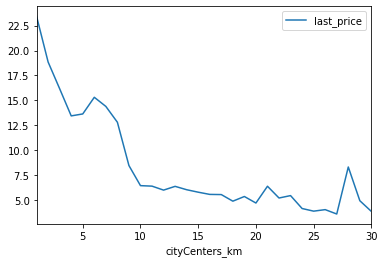

In [95]:
km_price.plot(x='cityCenters_km', y='last_price')

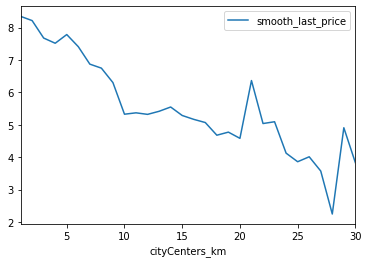

In [96]:
km_price_smooth = (spb_group.pivot_table(index='cityCenters_km', values='smooth_last_price', aggfunc='mean')
          .sort_values(by='cityCenters_km'))

km_price_smooth.reset_index(inplace=True)
km_price_smooth.plot(x='cityCenters_km', y='smooth_last_price')

График показывает, как цена зависит от удалённости от центра.  
Если судить по первому графику, он сильно меняется после 10 километров. Второй с меньшей силой, но тоже меняется. Примем **10 км** за центральную зону (хотя это странно, ведь там уже находятся станции метро спальных районов..)

## 4.7 Выделить сегмент квартир в центре. 
Проанализировать эту территорию и изучить следующие параметры:  
**площадь, цена, число комнат, высота потолков.**  
Также выделить факторы, которые влияют на стоимость квартиры (**число комнат, этаж, удалённость от центра, дата размещения объявления**). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

In [97]:
spb_center = spb_group.query('cityCenters_km < 10')

In [98]:
def hist_comparer(parametr, range_delta, bin_q):
    ax = (apartments_data
      .plot(kind='hist', y=parametr, histtype='step', range=range_delta, bins=bin_q,
            linewidth=5, alpha=0.7, label='all_data'))
    (spb_center
     .plot(kind='hist', y=parametr, histtype='step', range=range_delta, bins=bin_q,
       linewidth=5, alpha=0.7, label='spb_center', ax=ax, grid=True, legend=True))

### Площадь  
Сравним распределение площади для центральной зоны и всех локаций

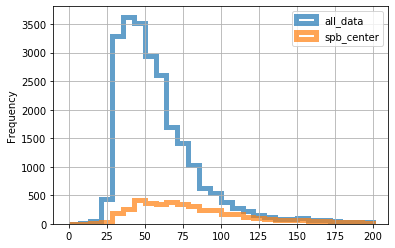

In [99]:
hist_comparer('total_area', (0, 200), 28)

В центральной зоне гораздо более плавное распределение площадей квавртир. Примерно с одинаковой частотой встречаются квартиры площадью от 50 до 75 м2. Но и количество записей здесь значительно меньше:

In [100]:
spb_center['total_area'].describe()

count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

### Число комнат
Сравним распределение

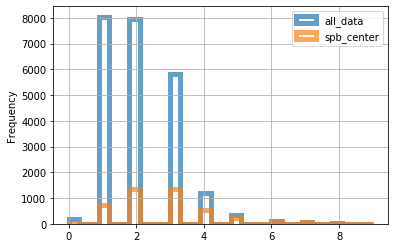

In [101]:
hist_comparer('rooms', (0, 9), 30)

 Число комнат в центральном регионе так же как и в общей таблице падает к 4 комнатам. А 2х и 3х комнатных квартир одинаковое количество. Посмотрим, сколько студий:

In [102]:
spb_center.query('studio == True')['studio'].count()

18

Соотношение студий/однокомнотных в общей таблице гораздо больше

### Цена

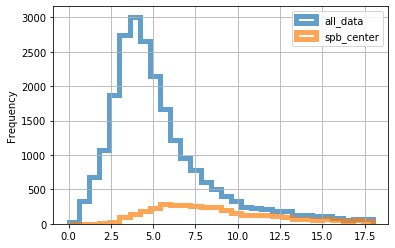

In [103]:
hist_comparer('last_price', (0, 18), 30)

Цена в центральной зоне так же смещена, здесь условный пик приходится на более дорогие квартиры по сравнению со всей таблицей. Набор 'высоты' начинается от 2.5 миллионов, до 9 миллионов держиться пик

### Высота потолков


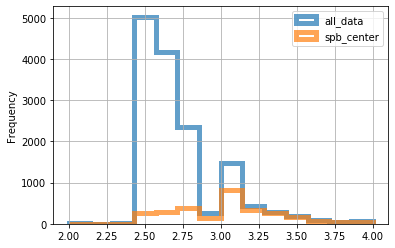

In [104]:
hist_comparer('ceiling_height', (2, 4), 14)

В какой-то степени можно сказать, что пик распространнености высот потолков набирается к 3м метрам, в общей таблице он ближе к 2.5, 2.6

Можно сказать, что в центральной зоне больше площади квартир, больше комнат, высота потолков ну и цена их выше. Так можно нагляднее увидеть влияние удаленности от центра.  
Теперь посмотрим на корреляцию стоимости квартиры с параметрами:  
**число комнат, этаж, удалённость от центра, дата размещения объявления**

### Стоимость и дата публикации (центр)

In [105]:
mixed_date = apartments_data[['pub_weekday', 'pub_month', 'pub_year', 'smooth_last_price']]
mixed_date['spb_smooth_last_price'] = spb_center['smooth_last_price']
mixed_date.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pub_weekday,pub_month,pub_year,smooth_last_price,spb_smooth_last_price
0,3,3,2019,NaN,NaN
1,1,12,2018,3.350,NaN
2,3,8,2015,5.196,NaN
3,4,7,2015,NaN,NaN
4,1,6,2018,10.000,10.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8b2b3a90>,
      dtype=object)

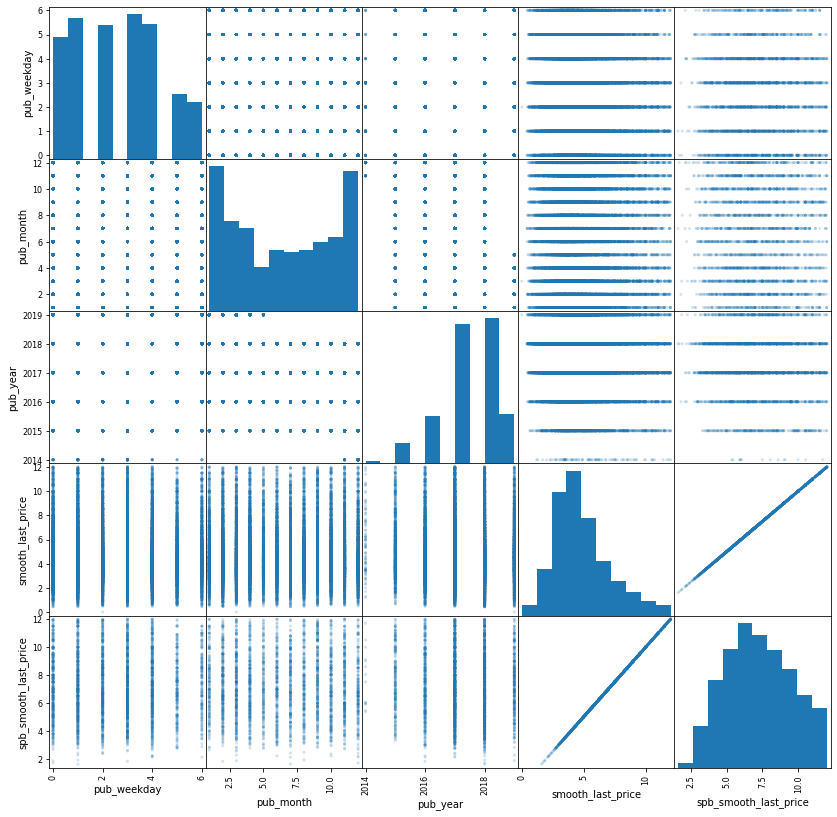

In [106]:
(pd.plotting
 .scatter_matrix(mixed_date,
                 figsize=(14, 14), alpha=0.2))


In [107]:
mixed_date.corr()

,pub_weekday,pub_month,pub_year,smooth_last_price,spb_smooth_last_price
pub_weekday,1.000000,0.011496,-0.004799,-0.015521,0.010191
pub_month,0.011496,1.000000,-0.269642,0.005662,-0.009568
pub_year,-0.004799,-0.269642,1.000000,-0.004946,-0.032237
smooth_last_price,-0.015521,0.005662,-0.004946,1.000000,1.000000
spb_smooth_last_price,0.010191,-0.009568,-0.032237,1.000000,1.000000


Совместное распределение дат и цены на графиках имеет одинаковый характер как для всей области так и для центральной зоны. Публикаций объявлений в центре стало больше с 2017 года. Если для области можно усмотреть хотя бы какую-то связь между месяцем и стоимостью (похоже, что там в мае было меньше объявлений с дорогими квартирами, чем, скажем, в ноябре), то теперь эту связь трудно разглядеть. Для всех городов в воскресенье публиковалось меньше объявлений с дорогими квартирами, для центральной зоны в субботу и в воскресенье впринципе меньше объявлений публикуется. Еще похоже в центральной зоне немного меньше публикуется объявлений по понедельникам.  
Если посмтреть на коэффициенты корреляции, они претерпели незначительные изменения, где-то поменялся знак, но с очень маленького значение на очень маленькое.

### Стоимость и высота этажей (центр)


In [108]:
mixed_floors = apartments_data[['floor_categories', 'smooth_last_price']]
mixed_floors['spb_smooth_last_price'] = spb_center['smooth_last_price']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


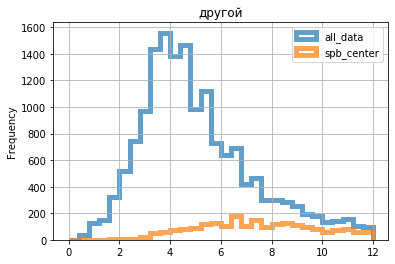

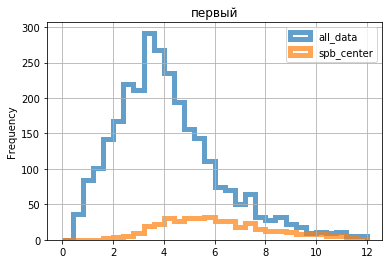

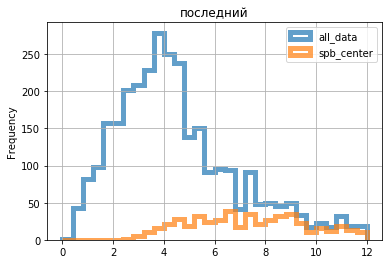

In [109]:
for name, group in mixed_floors.groupby('floor_categories'):
    ax = (group
      .plot(kind='hist', y='smooth_last_price', title=name, histtype='step', range=(0, 12), bins=30,
            linewidth=5, alpha=0.7, label='all_data'))
    (group
     .plot(kind='hist', y='spb_smooth_last_price', title=name, histtype='step', range=(0, 12), bins=30,
       linewidth=5, alpha=0.7, label='spb_center', ax=ax, grid=True, legend=True))

В центральной зоне квартиры на последнем этаже дешевле, наивысшая плоскость графика приходится на диапазон от 5 до 6 миллионов. На последних атажах наивысшие области графика сдвинуты в диапазон от 7 до 9 миллионов, хотя внктри него есть вариации. На других атажах график тяготеет в зону 6-8 миллионов.  
Для всего города первый этаж так же был более дешевым. Цена была выше для других этажей, а затем для последних.

In [110]:
floors_corr = (mixed_floors.pivot_table(index=['floor_categories'], 
                          values=['smooth_last_price', 'spb_smooth_last_price'], 
                          aggfunc=['mean', 'median']))
floors_corr

mean                                  median  \
                 smooth_last_price spb_smooth_last_price smooth_last_price   
floor_categories                                                             
другой                    5.055577              7.422606              4.60   
первый                    4.132557              6.141450              3.80   
последний                 4.507350              7.299086              4.05   

                                        
                 spb_smooth_last_price  
floor_categories                        
другой                           7.350  
первый                           5.900  
последний                        7.265

### Стоимость и количество комнат (центр)

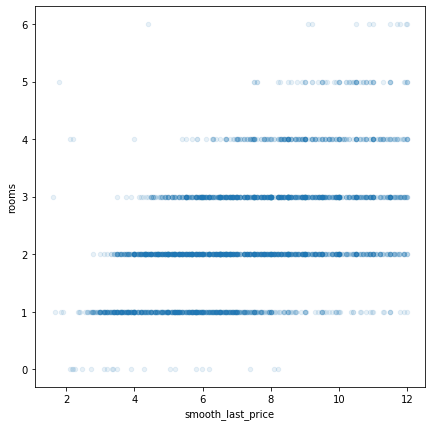

In [111]:
spb_center.plot(x='smooth_last_price', y='rooms', kind='scatter', figsize=(7, 7), alpha=0.1)


In [112]:
spb_center['smooth_last_price'].corr(spb_center['rooms'])

0.5041532658724658

Здесь так же как и для всего города наблюдается тенденция -- в дорогих квартирах больше комнат. Однако, для центра эта зависимость более резкая.

### Стоимость и удаленность от центра (центр)

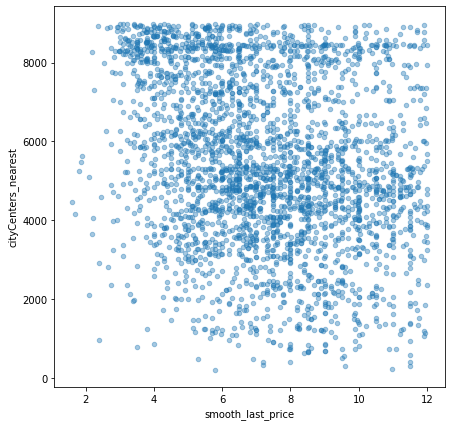

In [113]:
spb_center.plot(x='smooth_last_price', y='cityCenters_nearest', kind='scatter', figsize=(7, 7), alpha=0.4)

In [114]:
spb_center['smooth_last_price'].corr(spb_center['cityCenters_nearest'])

-0.24438750460307404

Какое бы то ни было устойчивао направление график не приобрел, а если вспомнить зависимость удаленности от центра во всем городе:  
 
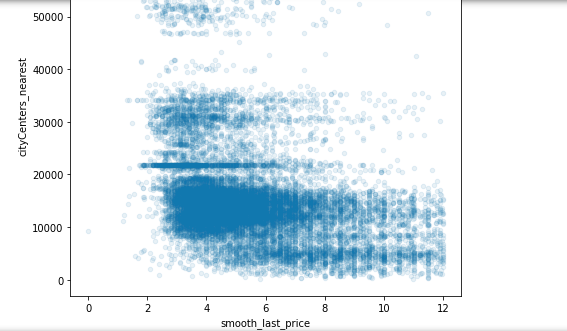

То там замое большое пересечение было в зоне от 10 до 20 км, сейчас этот участок не входит в график.  

На новом графике можно увидеть большее сгущение точек на 4-5 миллионах в районе 8 километров и 6-8 миллионах в районе 4-5 километрах. Коэффициент корреляции уменьшился в абсолютном значении относительно коэффициента по всму городу (-0.3614283836896798) Можно сказать, что зависимоть цены от удаленности немного ослабла.

## Шаг 5. Общий вывод

Мы пытались выяснить зависимость между стоимостью квартиры и некоторыми факторами:
число комнат, этаж, удалённость от центра, дата размещения объявления. Кроме того, была выделена центральная зона, где так же была исследована зависимость от цены от указанных факторов.

### Особенности:  
**Для всей области населенных пунктов:**

- самая распространенная площадь квартир: от 30 до 50 м2
- число комнат: 1-2, тут больше студий чем в центральной области Санкт-Петербурга
- цена от 3 до 5 млн, самые дешевые квартиры от 430 тыс
- высота потолков 2.4 - 2.6

**Для центра Санкт-Петербурга:**

- самая распространенная площадь квартир: от 50 до 75 м2
- число комнат: 2-3
- цена от 5.2 до 8 млн
- высота потолков 2.75 - 3.10

###  Зависимость стоимости от даты публикации:

Объявления о продаже квартир публикуются с 2014 года. Объявлений о продаже в центральной зоне стало больше с 2017 года. В целом зависимость от даты публикации незначительна. Для всей области есть некотрая подверженность колебаниям в зависимости от месяца:  
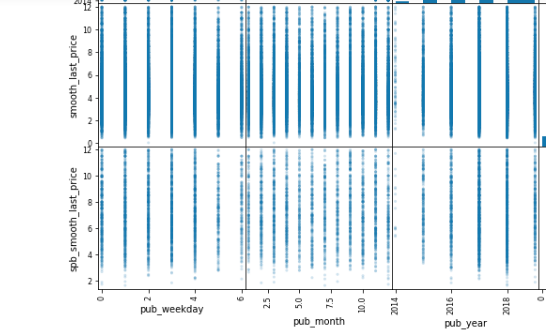
В некоторрых месяцах меньше объявлений с дорогими квартирами. В середине года едва заметно, что дорогих квартир меньше, чем ближе к концу. Тем не менее, коэффициенты корреляции небольшие:  

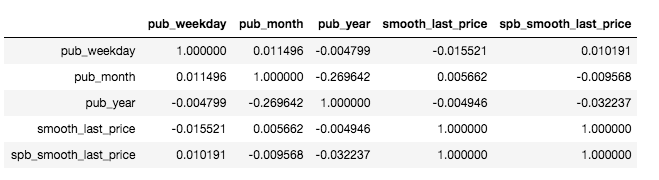

А для центральной зоны города эта зависимость прослеживается еще меньше.

### Зависимость стоимости от числа комнат:
Тут можно заметить общую тенденцию, чем больше число комнат, тем дороже квартира, причем для центра эта зависимость сильнее. Коэффициенты корреляции:  
Во всей области - 0.455  
В центре - 0.504

График для центра:  
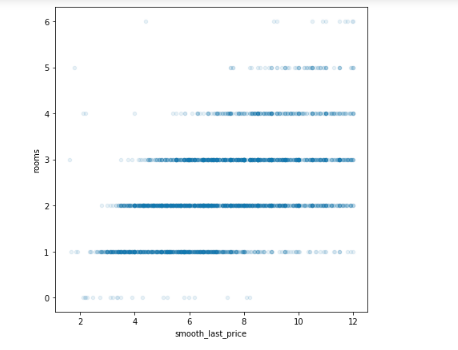

Для всей области:  
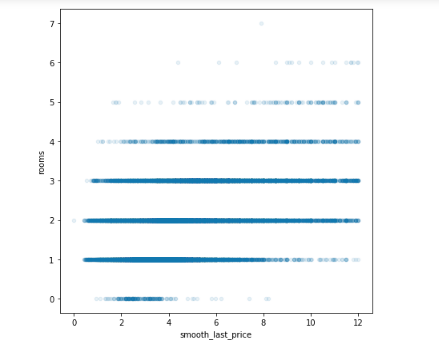

### Зависимость стоимости от этажа
Общая тенденция -- квартиры на первом этаже стоят дешевле, как для центра, так и для всей области.

In [115]:
floors_corr

mean                                  median  \
                 smooth_last_price spb_smooth_last_price smooth_last_price   
floor_categories                                                             
другой                    5.055577              7.422606              4.60   
первый                    4.132557              6.141450              3.80   
последний                 4.507350              7.299086              4.05   

                                        
                 spb_smooth_last_price  
floor_categories                        
другой                           7.350  
первый                           5.900  
последний                        7.265

### Зависимость стоимости от расстояния до центра:

Для центральной зоны характерны более дорогие квартиры, чем для всей области в целом. Диапазон цен смещается с с 3-5 до 5.2-8 миллионов:

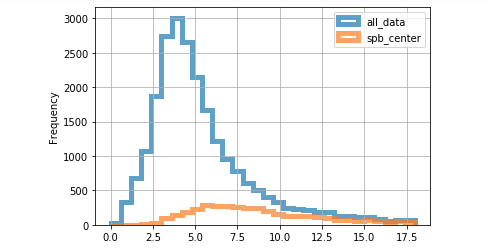
Что подтверждает гипотезу: чем дальше от центра, тем дороже квартиры.

Однако, если рассматривать зависимость от этого фактора в каждой группе по отдельности, то корреляция небольшая. Для центра: -0.244, для всей области: -0.361. Выборка для всей области гораздо крупнее, чем для центральной зоны, в ней смешиваются довольно большой разброс стоимостей квартир (в некоторых населенных пунктах стоимость начианется от 430 тыс) и довольно большой разброс расстояний. В группе центра наоборот сконецентрированно небольшое количество объявлений, тут градация движения вдаль от центра без сильных перепадов.